# Decision Trees mit dem Titanic-Datensatz
In diesem Jupyter Notebook schauen wir uns Entscheidungsbäume anhand des Titanic-Datensatzes an. Der Titanic-Datensatz beschreibt einen Teil der Reisenden auf der Titanic, unter anderem ob diese die Fahrt überlebt haben oder nicht.

- Der originale Datensatz kann hier abgerufen werden: https://www.kaggle.com/c/titanic
- Der hier verwendete Datensatz wurde zwecks Einfachheit bereits überarbeitet und angereichtert

## Lade Libraries und Daten

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

pd.options.mode.chained_assignment = None

DF = pd.read_csv('data/titanic_enh.csv')

## Datensatzbeschreibung

- PassengerId: Durchgehende Nummerierung der Datensatzeinträge
- Survived: 1 wenn Passagier überlebte, 0 wenn nicht
- Pclass: Passagierklasse. Enthält die Werte 1 bis 3, wobei 1 der ersten Klasse entspricht
- Name: Name der jeweiligen Person
- Sex: Geschlecht. 0 für Weiblich, 1 für Männlich
- Age: Altersgruppe
  - 0 -> 16 oder jünger
  - 1 -> Zwischen 16 und 32
  - 2 -> Zwischen 32 und 48
  - 3 -> Zwischen 48 und 64
  - 4 -> Älter als 64
- Ticket: Ticketnummer
- Fare: Kostenklasse der Färe.
  - 0 -> Ticket kostete 7.91 Pounds oder weniger
  - 1 -> Ticket kostete zwischen 7.91 und 14.454 Pounds
  - 2 -> Ticket kostete zwischen 14.454 und 31 Pounds
  - 3 -> Ticket kostete mehr als 31 Pounds
- Embarked: Ort des Zustiegs
  - 0 -> Southampton
  - 1 -> Cherbourg
  - 2 -> Queenstown
- Has_Cabin: 1 Wenn Passagier eine Kabine hatte, 0 wenn nicht
- FamilySize: Anzahl mitglieder der reisenden Familie
- IsAlone: 1 wenn Passagier alleine reiste, 0 wenn nicht
- Title: Namenstitel.
  - 1 -> Mr
  - 2 -> Master
  - 3 -> Mrs
  - 4 -> Miss
  - 5 -> Kein Titel

In [2]:
DF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,0,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,1,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,0,1,1,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,1,2,0,3
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,1,0,0,211536,1,NaN,0,0,1,1,5
887,888,1,1,"Graham, Miss. Margaret Edith",0,1,0,0,112053,2,B42,0,1,1,1,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,W./C. 6607,2,NaN,0,0,4,0,4
889,890,1,1,"Behr, Mr. Karl Howell",1,1,0,0,111369,2,C148,1,1,1,1,1


## <span style="color:red"> Aufgabe 1</span>
Überschaffe dir zuerst einen kleinen Überblick über den Datensatz. Kombiniere verschiedene Variablen mit der Variable *Survived* um zu sehen, welche Eigenschaften einen Einfluss auf das Überleben der Passagiere hatte.

> Wir verwenden für die Visualisierung Seaborn (importiert als *sns*). Die Spalten das Datensatzes werden mittels x- und y-Keyword den Achsen zugewiesen.

> Weiter werden Violin-Plots. Falls du Probleme hast, die Violin-Plots zu verstehen, dann lies kurz die Kapitel *What is a violin plot*, bzw. *How to read the anatomy of a violin plot* unter diesem Link: https://mode.com/blog/violin-plot-examples/

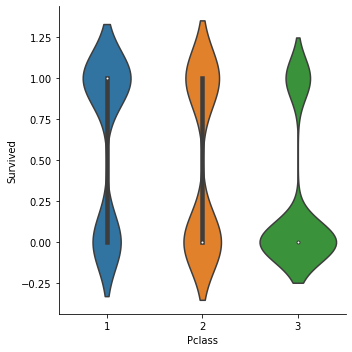

In [3]:
sns.catplot(x='Pclass', y='Survived', kind='violin', data=DF)

## <span style="color:red"> Aufgabe 2</span>

Nun wollen wir das Überleben von Passagieren mit Hilfe eines Decision Trees vorhersagen. Wir vollziehen dabei folgende Schritte:

1. Erstelle ein DecisionTreeClassifier Objekt unter Verwendung des Moduls *sklearn*.
   
>clf = DecisionTreeClassifier(max_depth = depth, criterion='gini')

2. Erstelle ein DataFrame für die Input-Variablen und die Output-Variablen.
   - Die Variable X ist zu Beginn lediglich ein Dataframe mit der Spalte *Pclass*. Die Spalten in der Variable X sind der Input für den Decision Tree
   - Die Variable y enthält die Spalte *Survived*. Die Variable y ist der Output. Der Decision Tree versucht nun Regeln zu erstellen, welche den Input X möglichst gut auf den Output y matchen.
   
> X = df[['Pclass']]
>
> y = df[['Survived']]
 

3. Trainiere den Decision Tree

> clf = clf.fit(X, y)

4. Treffe vorhersagen mit dem Trainierten Decision Tree

> y['Prediction'] = clf.predict(X)

5. Visualisiere den trainierten Decision Tree

> Code unterhalb *# Visualize Decision Tree*


### <span style="color:red"> Aufgabe 2a</span>
Führe die folgende Code-Zeile aus um deinen ersten Decision Tree zu trainieren. Du wirst ein Ergebnis sehen, welches es nun zu verstehen gilt. Wir trainieren dem Baum auf Basis der Entropie. Lies den folgenden Artikel bis zum Eintrag *Gini Index* und wähle danach die jeweils richtige Aussagen an.

https://blog.clairvoyantsoft.com/entropy-information-gain-and-gini-index-the-crux-of-a-decision-tree-99d0cdc699f4

*Tipp: Um eine Checkbox anzuwählen kannst du den Eintrag - [ ] durch - [x] ersetzen

**Aussagen zum Trainieren eines Entscheidungsbaums**
- [ ] Ein Entscheidungsbaum entscheidet vom **obersten** Knoten her bei jedem kommenden Entscheidungsknoten, anhand welchem Kriterium der Datensatz weiter unterteilt werden soll. Dabei entscheidet er sich jeweils für das Kriterium, welches aktuell den höchsten Informationsgewinn mit sich bringt. Die Entropie ist dabei die **einzige** Metrik, welche den Informationsgewinn messen kann.
- [ ] Ein Entscheidungsbaum entscheidet vom **obersten** Knoten her bei jedem kommenden Entscheidungsknoten, anhand welchem Kriterium der Datensatz weiter unterteilt werden soll. Dabei entscheidet er sich jeweils für das Kriterium, welches aktuell den höchsten Informationsgewinn mit sich bringt. Die Entropie ist **eine von vielen** Metriken, welche den Informationsgewinn messen können.
- [ ] Ein Entscheidungsbaum entscheidet von den **untersten** Knoten aus (den tatsächlichen Klassifizierungen) bei jedem darüber kommenden Entscheidungsknoten, anhand welchem Kriterium der Datensatz weiter unterteilt werden soll. Dabei entscheidet er sich jeweils für das Kriterium, welches aktuell den höchsten Informationsgewinn mit sich bringt. Die Entropie ist **eine von vielen** Metriken, welche den Informationsgewinn messen können.

**Aussagen zur Entropie**
Die Entropie ist eine Metrik für die "reinheit" eines Datensatzes. So hat z.B.
- [ ] Ein Datensatz mit 50 Elementen *A* und 50 Elementen *B* eine **höhere** Entropie als ein Datensatz mit 70 Elementen *A* und 30 Elementen *B*. Ein Entscheidungsbaum würde daher den **ersten** Datensatz bevorzugen.
- [ ] Ein Datensatz mit 50 Elementen *A* und 50 Elementen *B* eine **niedrigere** Entropie als ein Datensatz mit 70 Elementen *A* und 30 Elementen *B*. Ein Entscheidungsbaum würde daher den **ersten** Datensatz bevorzugen.
- [ ] Ein Datensatz mit 50 Elementen *A* und 50 Elementen *B* eine **höhere** Entropie als ein Datensatz mit 70 Elementen *A* und 30 Elementen *B*. Ein Entscheidungsbaum würde daher den **zweiten** Datensatz bevorzugen.
- [ ] Ein Datensatz mit 50 Elementen *A* und 50 Elementen *B* eine **niedrigere** Entropie als ein Datensatz mit 70 Elementen *A* und 30 Elementen *B*. Ein Entscheidungsbaum würde daher den **zweiten** Datensatz bevorzugen.

### <span style="color:red"> Aufgabe 2b</span>

Mit deinem Wissen über Entropie und Entscheidungsbäume würdest du basierend auf dem unten gezeigten Entscheidungsbaum

- in Anbetracht des Entscheidungskriteriums lieber einer tieferen oder einer höheren Klasse auf der Titanic angehört haben? Ist das im Einklang zu einer entsprechenden Visualisierung aus Aufgabe 1?

> Deine Antwort

- in Anbetracht der Entropie der Zuteilungen auf die Entscheidung des Entscheidungsbaums zählen? Ist das wiederum im Einklang zu einer entsprechenden Visualisierung aus Aufgabe 1?

> Deine Antwort

### <span style="color:red"> Aufgabe 2c</span>

Ersetze die betrachtete Spalte *Pclass* durch *Title* und betrachte den neu trainierten Baum. Würdest du *Pclass* oder *Title* bevorzugen?

> Deine Antwort

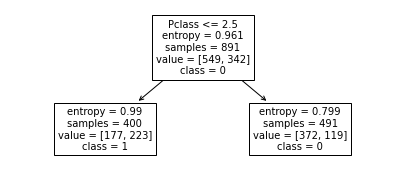

In [4]:
df = DF.copy()

depth = 1
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = depth, criterion='entropy')

# Create Input- and Output-Structure
X = df[['Pclass']]
y = df[['Survived']]

# Train Decision Tree Classifer
clf = clf.fit(X, y)

# Create Predictions
y['Prediction'] = clf.predict(X)

# Visualize Decision Tree
plt.figure(figsize=(depth * 7, depth * 3))  # set plot size (denoted in inches)
dt_target_names = [str(s) for s in y['Survived'].unique()]
tree.plot_tree(clf,
               fontsize=10,
               feature_names = X.columns,
               class_names = dt_target_names)
plt.show()

## <span style="color:red"> Aufgabe 3</span>

Einen Entscheidungsbaum zu trainieren ist gut und recht, wir wollen jetzt aber auch seine Vorhersagen überprüfen. Wir verwenden dafür die KFold Cross Validation. Dabei werden die Einträge des Datensatzes zuerst durchmischt und der Baum danach nur auf einem Teil des Datensatzes (wir wählen 80%) trainiert. Die restlichen 20% werden für das Überprüfen unserer Vorhersagen verwendet.

Der folgende Code enthält dasselbe Trainieren des oben gezeigten Baums, allerdings wird der Baum auf einem Trainings-Datensatz trainiert und mit dem trainierten Baum die Vorhersagen für einen Test-Datensatz gemacht.

Weiter wird unter *Calculate Performance Metric* der Anteil richtiger Vorhersagen im Test-Datensatz ausgegeben.

### <span style="color:red"> Aufgabe 3a</span>
Führe die folgende Code-Zeile wiederholt aus. Bleibt die Performance immer gleich? Und der Trainierte Baum? Kannst du dieses Verhalten erklären?

> Deine Antwort

### <span style="color:red"> Aufgabe 3b</span>
Füge alle numerischen und sinnvollen Spalten als Trainigs-Spalten hinzu (*training_columns*) und erhöhe die erlaubte Tiefe des Baums (*depth*) auf 3. Somit verwendet der Baum für das Trainieren alle Input-Variablen und verfeinert die Ergebnisse auf bis zu 3 Entscheidungen pro Datensatz.

Wält der Baum immer dieselben Variablen für die Entscheidungen? Falls nicht, kannst du dieses Phänomen erklären?

> Deine Antwort

### <span style="color:red"> Aufgabe 3c</span>
Spiele mit der erlaubten Tiefe des Baums (*depth*) herum. Werden die Ergebniss mit grösserer Tiefe zuverlässig besser? Falls nicht, kannst du dir dieses Phänomen erklären?

*Tipp: Lies folgenden Artikel und argumentiere in deiner Antwort mit den Begriffen "Overfitting" und "Underfitting". https://towardsdatascience.com/what-are-overfitting-and-underfitting-in-machine-learning-a96b30864690

> Deine Antwort


Performance: 60.3%


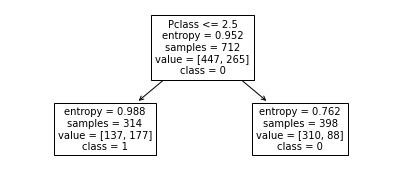

In [5]:
depth = 1
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = depth, criterion='entropy')

# Sample for KFold
df = DF.copy()
train, test = train_test_split(df, test_size=0.2)

# Create Input- and Output-Structure and train Decision Tree Classifer
training_columns = ['Pclass']

X = train[training_columns]
y = train[['Survived']]
clf = clf.fit(X, y)

# Create Predictions
X = test[training_columns]
y = test[['Survived']]
y['Prediction'] = clf.predict(X)

# Calculate Performance Metric
y['match'] = y['Survived'] == y['Prediction']
performance =  sum(y['match']) / len(y)
print('Performance: {:.1%}'.format(performance))

# Visualize Decision Tree
plt.figure(figsize=(depth * 7, depth * 3))  # set plot size (denoted in inches)
dt_target_names = [str(s) for s in y['Survived'].unique()]
tree.plot_tree(clf,
               fontsize=10,
               feature_names = X.columns,
               class_names = dt_target_names)
plt.show()

## <span style="color:red"> Aufgabe 4</span>

Die Tiefe des Baums nennt man im Machine Learning einen sogenannten *Hyperparameter*. Es ist ein Parameter, welcher die Performance des Modells ad ante beeinflusst, dessen optimaler Wert aber noch gesucht werden muss. Baue deinen eigenen Mechanismus um den optimalen Wert für die Tiefe des Baums zu finden.

Vorgehensvorschlag:
1. Kopiere den Code aus Aufgabe 3 (ohne Visualisierung)
2. Baue eine verschachtelte Schleife. In der oberen Schleife wird der Wert für die Tiefe des Baumes verwändert (z.B. von 1 bis 5). In der zweiten Schleife wird der Baum z.B. 10 Mal trainiert und validiert.
3. Mittle die Performance des Baumns pro Tiefe und erstelle dir eine Übersicht. Findest du ein Optimum?